In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  
%matplotlib inline

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
import math

In [82]:
Default1= pd.read_csv("avocado.csv")
Default1.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [83]:
print('The number of rows (observations) is',Default1.shape[0],'\n''The number of columns (variables) is',Default1.shape[1])

The number of rows (observations) is 18249 
The number of columns (variables) is 14


In [84]:
Default1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [85]:
print("No.Of Duplicate Rows",Default1.duplicated().sum())

No.Of Duplicate Rows 0


In [86]:
Default1.shape

(18249, 14)

In [87]:
Default1.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [88]:
Default1.describe(include="all")

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
count,18249.000000,18249,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249,18249.000000,18249
unique,NaN,169,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,54
top,NaN,2015-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,conventional,NaN,Albany
freq,NaN,108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9126,NaN,338
mean,24.232232,NaN,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,NaN,2016.147899,NaN
std,15.481045,NaN,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,NaN,0.939938,NaN
min,0.000000,NaN,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,NaN,2015.000000,NaN
25%,10.000000,NaN,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,NaN,2015.000000,NaN
50%,24.000000,NaN,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,NaN,2016.000000,NaN
75%,38.000000,NaN,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,NaN,2017.000000,NaN


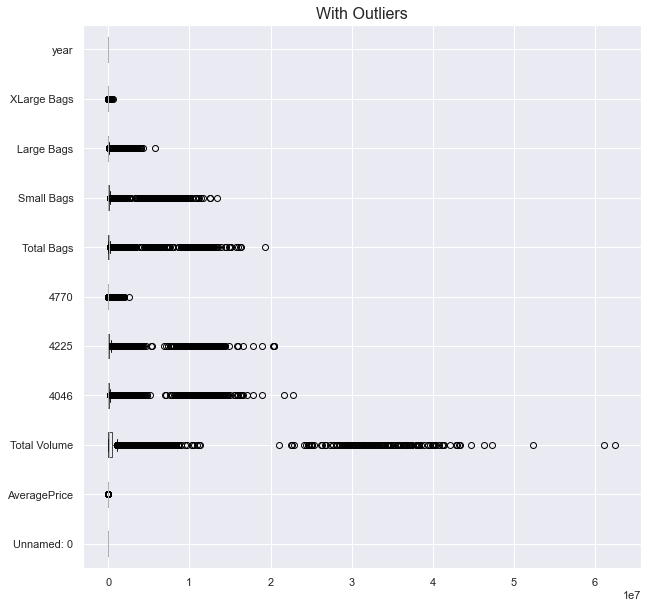

In [89]:

plt.figure(figsize=(10,10))
Default1.boxplot(vert=0)
plt.title('With Outliers',fontsize=16)
plt.show()

In [90]:
def univariateAnalysis(column):
    print("Description of"+column)
    print(Default1[column].describe(),end=' ')
    plt.figure()
    print("Description of"+column)
    sns.distplot(Default1[column],kde=True,color='g',norm_hist=True);
    plt.show()

In [91]:
df2=Default1.select_dtypes(include=['float64','int64'])
lstnumericcolumns=list(df2.columns)
len(lstnumericcolumns)

11

Description ofUnnamed: 0
count    18249.000000
mean        24.232232
std         15.481045
min          0.000000
25%         10.000000
50%         24.000000
75%         38.000000
max         52.000000
Name: Unnamed: 0, dtype: float64 Description ofUnnamed: 0


<ipython-input-90-f2b73f56334b>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Default1[column],kde=True,color='g',norm_hist=True);


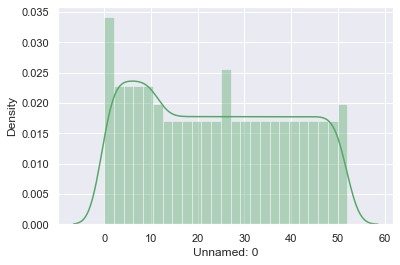

Description ofAveragePrice
count    18249.000000
mean         1.405978
std          0.402677
min          0.440000
25%          1.100000
50%          1.370000
75%          1.660000
max          3.250000
Name: AveragePrice, dtype: float64 Description ofAveragePrice


<ipython-input-90-f2b73f56334b>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Default1[column],kde=True,color='g',norm_hist=True);


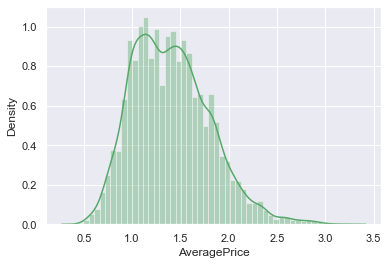

Description ofTotal Volume
count    1.824900e+04
mean     8.506440e+05
std      3.453545e+06
min      8.456000e+01
25%      1.083858e+04
50%      1.073768e+05
75%      4.329623e+05
max      6.250565e+07
Name: Total Volume, dtype: float64 Description ofTotal Volume


<ipython-input-90-f2b73f56334b>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Default1[column],kde=True,color='g',norm_hist=True);


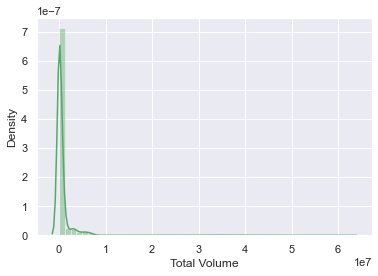

Description of4046
count    1.824900e+04
mean     2.930084e+05
std      1.264989e+06
min      0.000000e+00
25%      8.540700e+02
50%      8.645300e+03
75%      1.110202e+05
max      2.274362e+07
Name: 4046, dtype: float64 Description of4046


<ipython-input-90-f2b73f56334b>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Default1[column],kde=True,color='g',norm_hist=True);


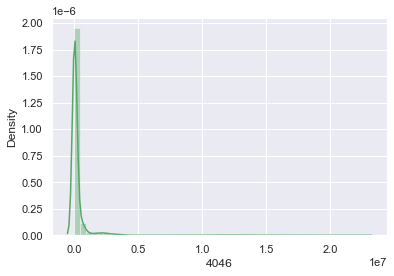

Description of4225
count    1.824900e+04
mean     2.951546e+05
std      1.204120e+06
min      0.000000e+00
25%      3.008780e+03
50%      2.906102e+04
75%      1.502069e+05
max      2.047057e+07
Name: 4225, dtype: float64 Description of4225


<ipython-input-90-f2b73f56334b>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Default1[column],kde=True,color='g',norm_hist=True);


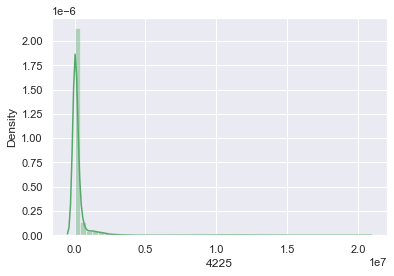

Description of4770
count    1.824900e+04
mean     2.283974e+04
std      1.074641e+05
min      0.000000e+00
25%      0.000000e+00
50%      1.849900e+02
75%      6.243420e+03
max      2.546439e+06
Name: 4770, dtype: float64 Description of4770


<ipython-input-90-f2b73f56334b>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Default1[column],kde=True,color='g',norm_hist=True);


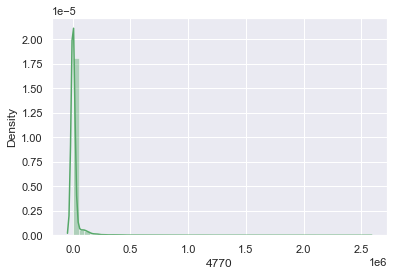

Description ofTotal Bags
count    1.824900e+04
mean     2.396392e+05
std      9.862424e+05
min      0.000000e+00
25%      5.088640e+03
50%      3.974383e+04
75%      1.107834e+05
max      1.937313e+07
Name: Total Bags, dtype: float64 Description ofTotal Bags


<ipython-input-90-f2b73f56334b>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Default1[column],kde=True,color='g',norm_hist=True);


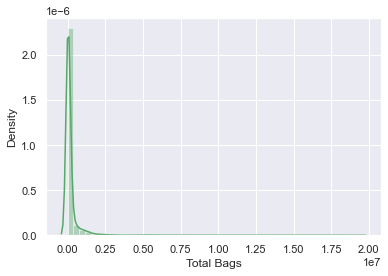

Description ofSmall Bags
count    1.824900e+04
mean     1.821947e+05
std      7.461785e+05
min      0.000000e+00
25%      2.849420e+03
50%      2.636282e+04
75%      8.333767e+04
max      1.338459e+07
Name: Small Bags, dtype: float64 Description ofSmall Bags


<ipython-input-90-f2b73f56334b>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Default1[column],kde=True,color='g',norm_hist=True);


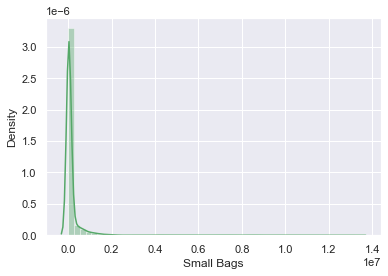

Description ofLarge Bags
count    1.824900e+04
mean     5.433809e+04
std      2.439660e+05
min      0.000000e+00
25%      1.274700e+02
50%      2.647710e+03
75%      2.202925e+04
max      5.719097e+06
Name: Large Bags, dtype: float64 Description ofLarge Bags


<ipython-input-90-f2b73f56334b>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Default1[column],kde=True,color='g',norm_hist=True);


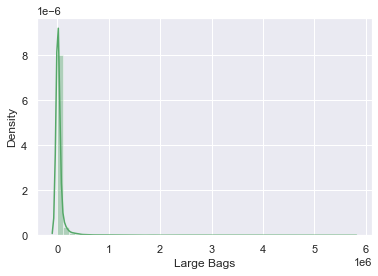

Description ofXLarge Bags
count     18249.000000
mean       3106.426507
std       17692.894652
min           0.000000
25%           0.000000
50%           0.000000
75%         132.500000
max      551693.650000
Name: XLarge Bags, dtype: float64 Description ofXLarge Bags


<ipython-input-90-f2b73f56334b>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Default1[column],kde=True,color='g',norm_hist=True);


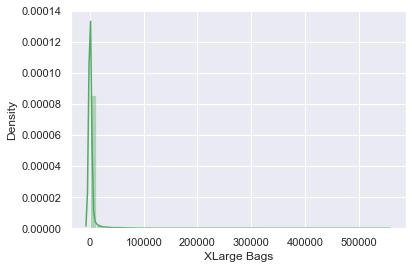

Description ofyear
count    18249.000000
mean      2016.147899
std          0.939938
min       2015.000000
25%       2015.000000
50%       2016.000000
75%       2017.000000
max       2018.000000
Name: year, dtype: float64 Description ofyear


<ipython-input-90-f2b73f56334b>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Default1[column],kde=True,color='g',norm_hist=True);


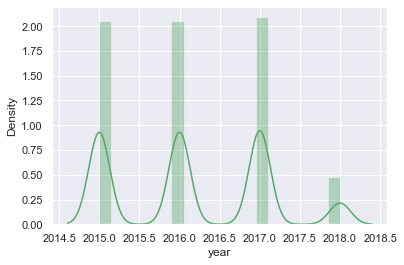

In [92]:
for x in lstnumericcolumns:
    univariateAnalysis(x)

In [93]:
Default1.drop(columns=['Unnamed: 0'], inplace=True)

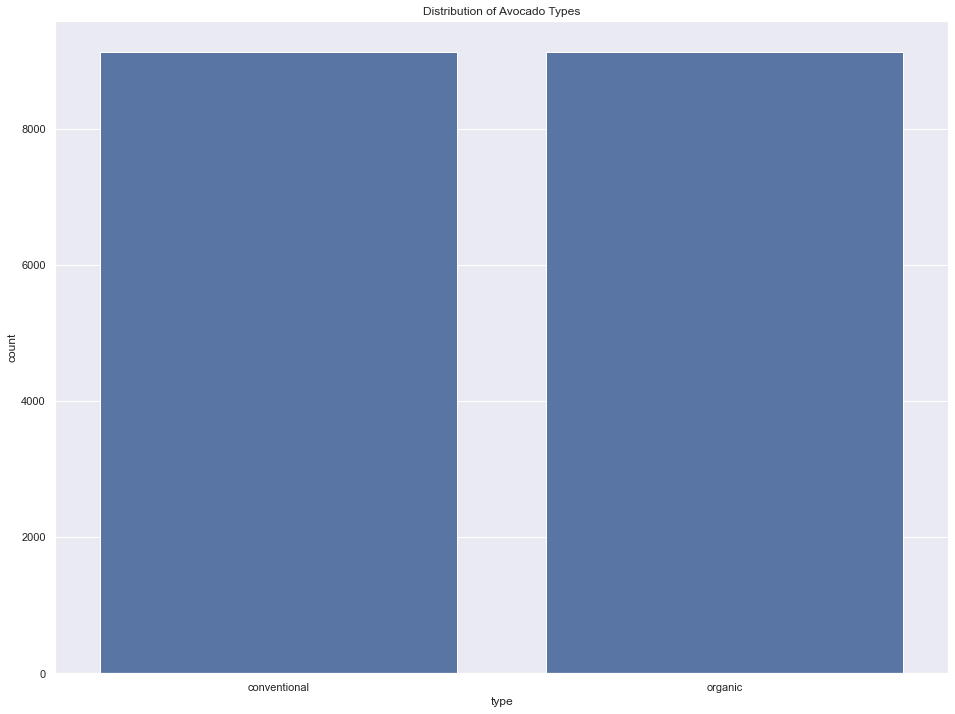

In [94]:
plt.figure(figsize=(16, 12))
sns.countplot(data=Default1, x='type')
plt.title('Distribution of Avocado Types')
plt.show()

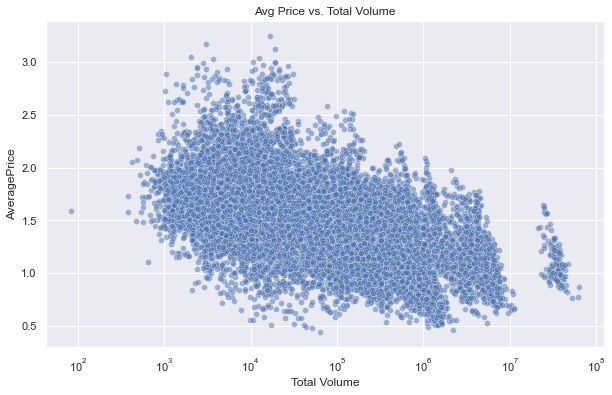

In [95]:

plt.figure(figsize=(10, 6))
sns.scatterplot(data=Default1, x='Total Volume', y='AveragePrice', alpha=0.5)
plt.xscale('log') 
plt.title('Avg Price vs. Total Volume')
plt.show()


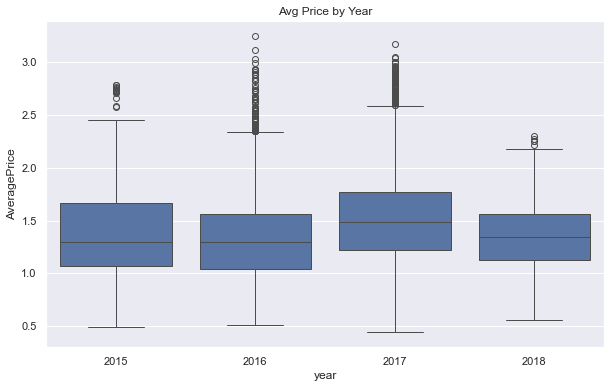

In [96]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=Default1, x='year', y='AveragePrice')
plt.title('Avg Price by Year')
plt.show()

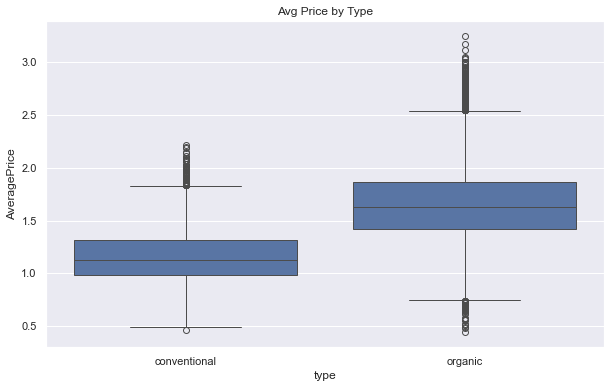

In [97]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=Default1, x='type', y='AveragePrice')
plt.title('Avg Price by Type')
plt.show()


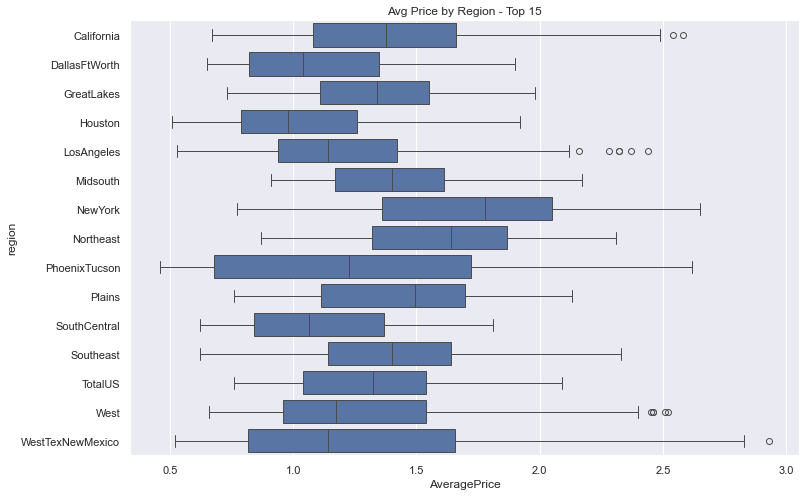

In [98]:
best_regions = Default1.groupby('region')['Total Volume'].sum().nlargest(15).index
filterdt = Default1[Default1['region'].isin(best_regions)]

plt.figure(figsize=(12, 8))
sns.boxplot(data=filterdt, x='AveragePrice', y='region', orient='h')
plt.title('Avg Price by Region - Top 15')
plt.show()

The distribution of average avocado prices by region for the top 15 regions has been displayed using the boxplot. Regions towards the bottom of the chart, such as "West" and "WestTexNewMexico," show lower average prices and narrower price ranges, while regions like "Northeast" And "Newyork" exhibit higher median prices and wider variability. These variations likely reflect the differences in regional market conditions affecting avocado prices.

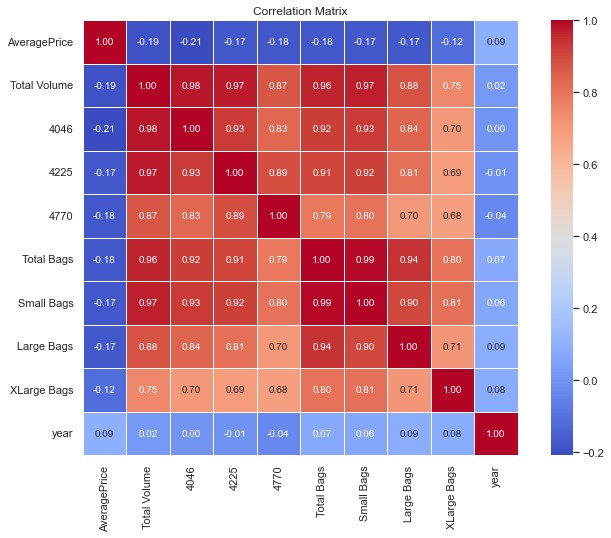

In [99]:

corr_mat = Default1.select_dtypes(include=[float, int]).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_mat, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


Here we have observed that the correlations among variables related to avocado sales. High positive correlations exist between Total Volume, 4046, 4225, 4770, and bag sizes, indicating strong associations between total sales and specific types of avocados. Average Price shows a slight negative correlation with these volumes, suggesting that higher sales volumes might correspond to lower prices.


In [100]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_squared_error
import pandas as pd
Default1['Date'] = pd.to_datetime(Default1['Date'])
Default1['Month'] = Default1['Date'].dt.month
Default1['Day'] = Default1['Date'].dt.day
Default1['type'] = LabelEncoder().fit_transform(Default1['type'])



In [101]:

X = Default1.drop(['region', 'Date'], axis=1)
y = LabelEncoder().fit_transform(Default1['region'])
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)




In [102]:

X_reg = Default1.drop(['AveragePrice', 'Date', 'region'], axis=1)
y_reg = Default1['AveragePrice']
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42)



In [103]:

model1 = DecisionTreeClassifier(random_state=42)
model_reg = RandomForestRegressor(random_state=42)
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)



In [104]:

model_reg.fit(X_train_reg, y_train_reg)
y_pred_reg = model_reg.predict(X_test_reg)
mse = mean_squared_error(y_test_reg, y_pred_reg)



In [105]:

print(f"Classification Accuracy: {accuracy}")
print(f"Regression MSE: {mse}")

Classification Accuracy: 0.8019178082191781
Regression MSE: 0.02117949138356164


The final output indicate a classification accuracy of 80.19%, suggesting that the model effectively predicts categories of high or low demand in the given dataset. The MSE of 0.02117 indicates a good fit for predicting continuous outcomes, like avocado prices, with relatively low error.


In [106]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import accuracy_score, mean_squared_error
import pandas as pd
le_region1 = LabelEncoder()
le_type1 = LabelEncoder()
Default1['region'] = le_region1.fit_transform(Default1['region'])
Default1['type'] = le_type1.fit_transform(Default1['type'])
X = Default1.drop(['region', 'Date'], axis=1)
y = Default1['region']

X_reg = Default1.drop(['AveragePrice', 'Date'], axis=1)
y_reg = Default1['AveragePrice']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_reg_scaled = scaler.fit_transform(X_reg)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg_scaled, y_reg, test_size=0.2, random_state=42)




In [107]:

svm_classifier1 = SVC(random_state=42)
svm_classifier1.fit(X_train_class, y_train_class)


SVC(random_state=42)

In [108]:

y_pred = svm_classifier.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred)

In [109]:

print(f"SVM Classification Accuracy: {accuracy_svm}")

SVM Classification Accuracy: 0.2263013698630137


In [110]:

gb_reg = GradientBoostingRegressor(random_state=42)
gb_reg.fit(X_train_reg, y_train_regress)


GradientBoostingRegressor(random_state=42)

In [111]:
y_pred_reg = gb_reg.predict(X_test_reg)
mse_gb = mean_squared_error(y_test_reg, y_pred_reg)

In [112]:

print(f"Gradient Boosting Regression MSE: {mse_gb}")

Gradient Boosting Regression MSE: 0.041600546078745027


The classification accuracy for the avocado dataset stands at approximately 80.2%, indicating strong predictive performance. But, SVM classification accuracy is very low at around 22.6%. In regression, the mean squared error is approx0.021 for classification and 0.042 for gradient boosting regression, indicating relatively moderate predictions overall. So, based on the various models the random forest regressor model is best one to predict the find the region and find the average price.